### Importing Libraries

In [225]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the Dataset

In [226]:
df = pd.read_csv('/content/penguins_size.csv')
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


### Exploring the Dataset

In [227]:
df.shape

(344, 7)

 Descriptive statistics

In [228]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [229]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [230]:
df.isnull().any()

species              False
island               False
culmen_length_mm      True
culmen_depth_mm       True
flipper_length_mm     True
body_mass_g           True
sex                   True
dtype: bool

In [231]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [232]:
# for numerical column null values replacement
df['culmen_length_mm'].fillna(df['culmen_length_mm'].median(),inplace=True)
df['culmen_depth_mm'].fillna(df['culmen_depth_mm'].median(),inplace=True)
df['flipper_length_mm'].fillna(df['flipper_length_mm'].median(),inplace=True)
df['body_mass_g'].fillna(df['body_mass_g'].median(),inplace=True)

In [233]:
df[df['sex'] == '.']
df['sex'][df['sex'] == '.'] = np.nan
print(df.loc[338])

species              Gentoo
island               Biscoe
culmen_length_mm       47.2
culmen_depth_mm        13.7
flipper_length_mm     214.0
body_mass_g          4925.0
sex                  FEMALE
Name: 338, dtype: object


<ipython-input-233-6292ab9e4127>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sex'][df['sex'] == '.'] = np.nan


In [234]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      0
culmen_depth_mm       0
flipper_length_mm     0
body_mass_g           0
sex                  11
dtype: int64

In [235]:
df[df.isnull().any(axis=1)]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,44.45,17.3,197.0,4050.0,NaN
8,Adelie,Torgersen,34.10,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.00,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.80,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.80,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.50,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.50,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.20,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.30,13.8,216.0,4725.0,NaN
336,Gentoo,Biscoe,44.50,15.7,217.0,4875.0,NaN


In [236]:
df.sex.value_counts()

MALE      168
FEMALE    165
Name: sex, dtype: int64

In [237]:
df['sex']=df['sex'].replace(".","MALE")

In [238]:
df['sex']=df['sex'].fillna("MALE")

In [239]:
df.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [240]:
df.species.value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

In [241]:
df.island.value_counts()

Biscoe       168
Dream        124
Torgersen     52
Name: island, dtype: int64

### Coorelation

In [242]:
df.corr()

<ipython-input-242-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
culmen_length_mm,1.000000,-0.235000,0.655858,0.594925
culmen_depth_mm,-0.235000,1.000000,-0.583832,-0.471942
flipper_length_mm,0.655858,-0.583832,1.000000,0.871221
body_mass_g,0.594925,-0.471942,0.871221,1.000000


### Visualisation

Univariate Analysis

<ipython-input-243-87f900721a46>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['culmen_length_mm'])


<Axes: xlabel='culmen_length_mm', ylabel='Density'>

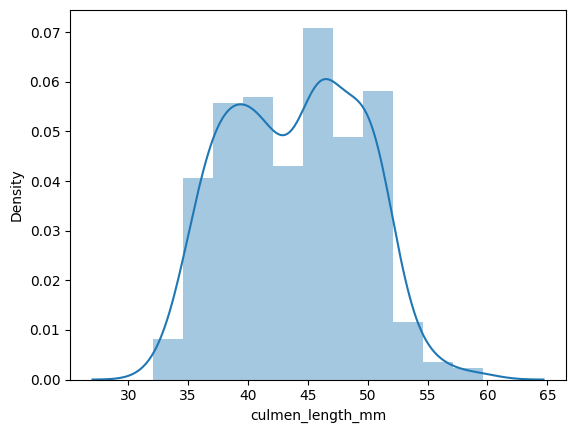

In [243]:
sns.distplot(df['culmen_length_mm'])

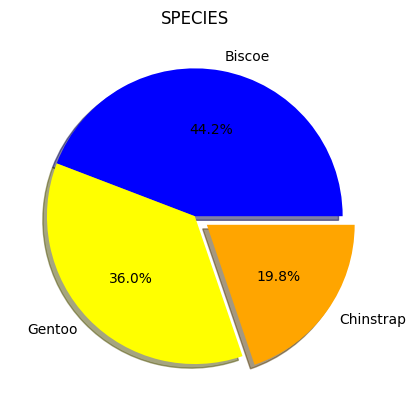

In [244]:
plt.pie(df.species.value_counts(),[0,0,0.1],labels = ['Biscoe','Gentoo','Chinstrap'],autopct ='%1.1f%%',shadow = True,colors = ['blue','yellow','orange'])
plt.title('SPECIES')
plt.show()

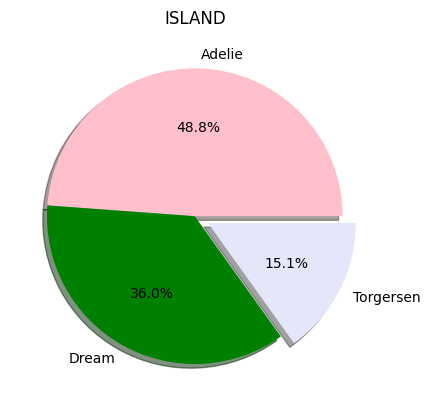

In [245]:
plt.pie(df.island.value_counts(),[0,0,0.1],labels = ['Adelie','Dream','Torgersen'],autopct ='%1.1f%%',shadow = True,colors = ['pink','green','lavender'])
plt.title('ISLAND')
plt.show()

<Axes: ylabel='island'>

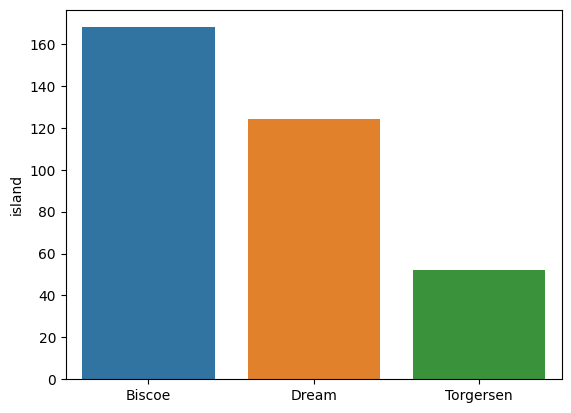

In [246]:
sns.barplot(x=df.island.value_counts().index,y=df.island.value_counts())

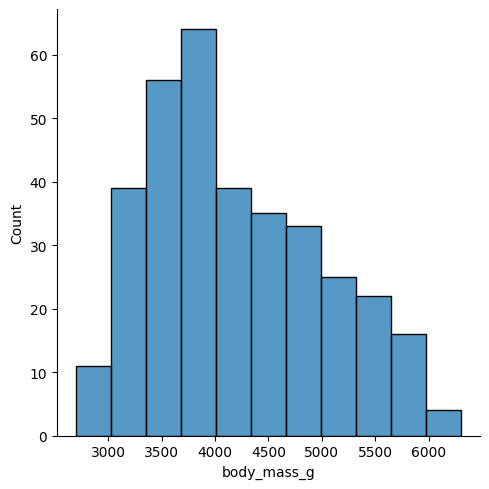

In [247]:
sns.displot(df['body_mass_g'])

Bi-Variate Analysis

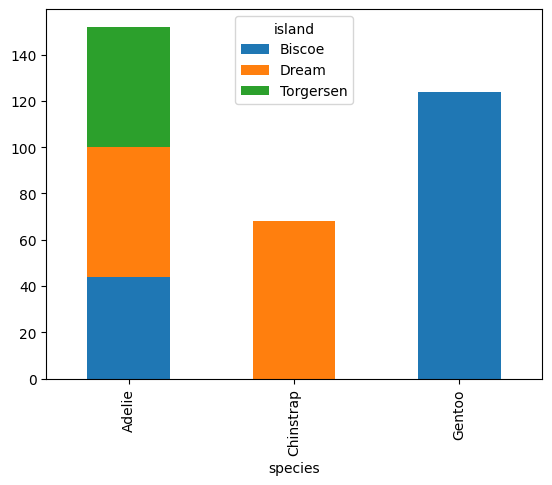

In [248]:
df1 = df.groupby(['species', 'island']).size().unstack(fill_value=0)
df1.plot(kind='bar', stacked=True)
plt.show()

Multi-Variate Analysis

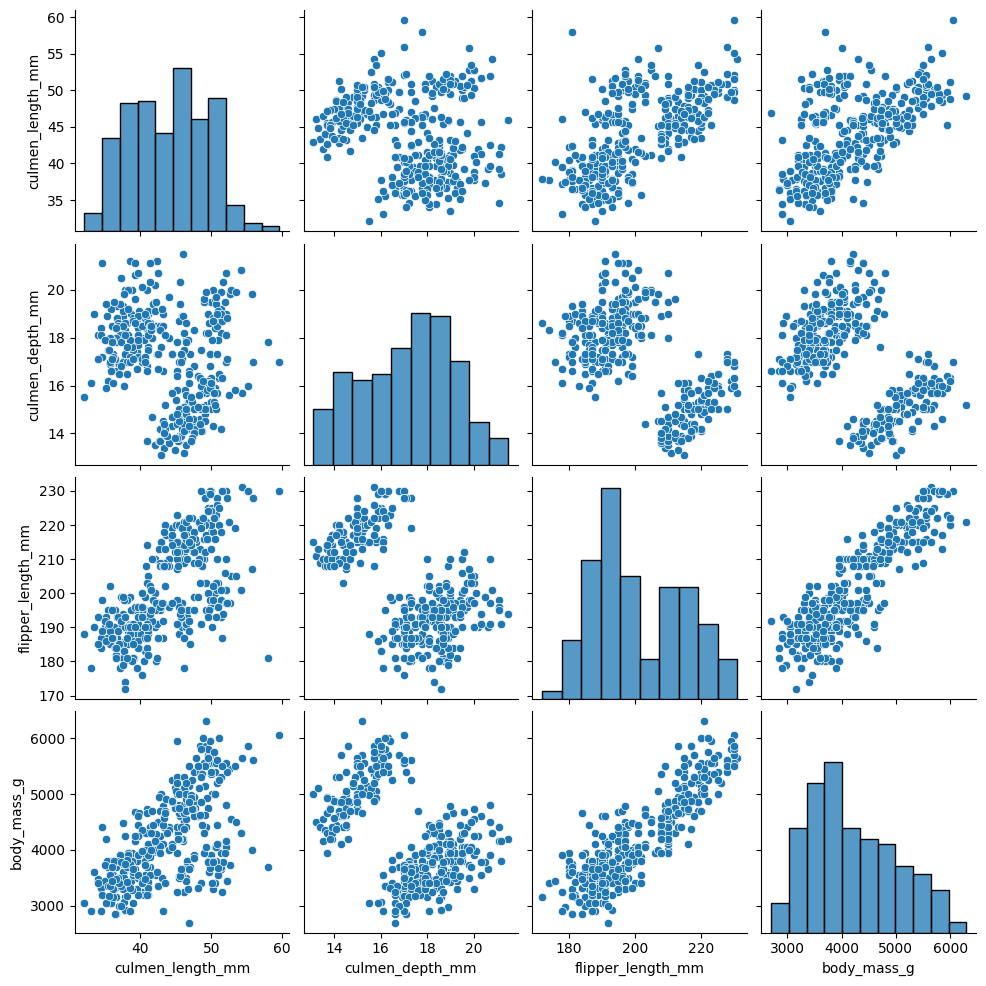

In [249]:
sns.pairplot(df)

<ipython-input-250-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

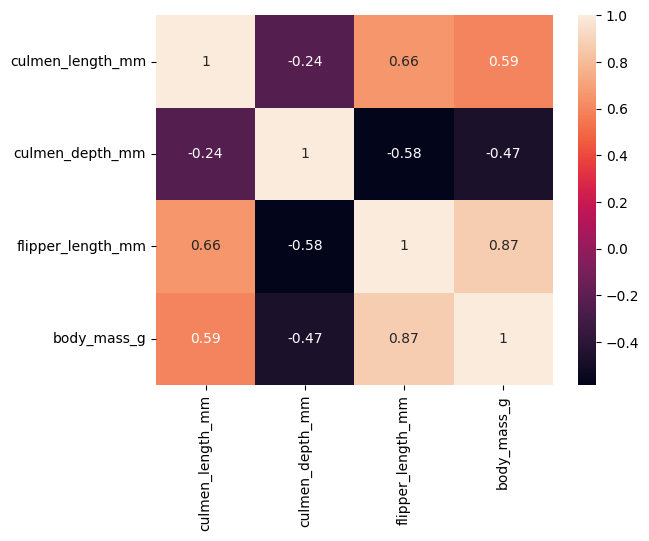

In [250]:
sns.heatmap(df.corr(),annot=True)

### Outlier Detection


<Axes: >

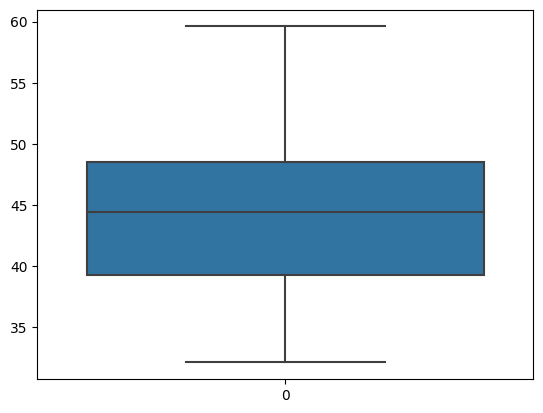

In [251]:
sns.boxplot(df['culmen_length_mm'])

<Axes: >

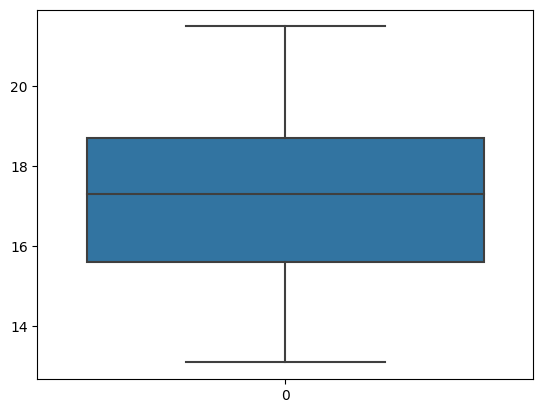

In [252]:
sns.boxplot(df['culmen_depth_mm'])

<Axes: >

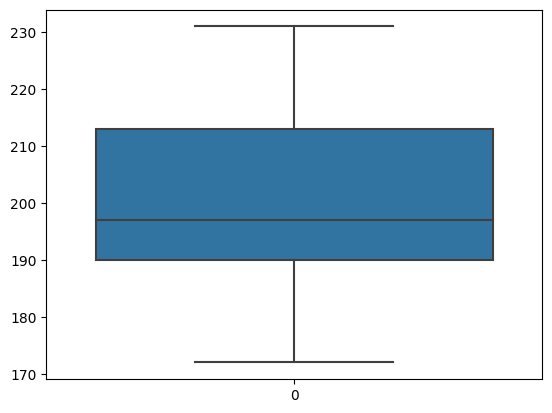

In [253]:
sns.boxplot(df['flipper_length_mm'])

<Axes: >

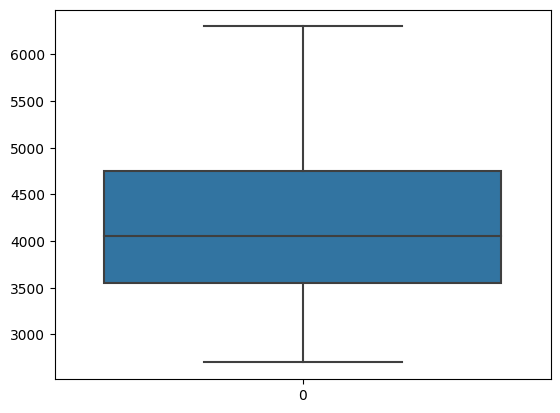

In [254]:
sns.boxplot(df['body_mass_g'])

### Encoding

In [255]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [256]:
#df.species=le.fit_transform(df.species)
df.island=le.fit_transform(df.island)
df.sex=le.fit_transform(df.sex)
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,2,39.10,18.7,181.0,3750.0,1
1,Adelie,2,39.50,17.4,186.0,3800.0,0
2,Adelie,2,40.30,18.0,195.0,3250.0,0
3,Adelie,2,44.45,17.3,197.0,4050.0,1
4,Adelie,2,36.70,19.3,193.0,3450.0,0


### X & Y Split

In [257]:
#x-independent
x=df.drop(columns=['species'],axis=1)
x.head()

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,2,39.10,18.7,181.0,3750.0,1
1,2,39.50,17.4,186.0,3800.0,0
2,2,40.30,18.0,195.0,3250.0,0
3,2,44.45,17.3,197.0,4050.0,1
4,2,36.70,19.3,193.0,3450.0,0


In [258]:
#y-dependent
y=df.species
y.head()

0    Adelie
1    Adelie
2    Adelie
3    Adelie
4    Adelie
Name: species, dtype: object

### Scaling the data

In [259]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()

In [260]:
x_Scaled=pd.DataFrame(scale.fit_transform(x),columns=x.columns)
x_Scaled.head()

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,1.0,0.254545,0.666667,0.152542,0.291667,1.0
1,1.0,0.269091,0.511905,0.237288,0.305556,0.0
2,1.0,0.298182,0.583333,0.389831,0.152778,0.0
3,1.0,0.449091,0.500000,0.423729,0.375000,1.0
4,1.0,0.167273,0.738095,0.355932,0.208333,0.0


### Train - Test Split

In [261]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_Scaled,y,test_size=0.3,random_state=0)

In [262]:
x_train.shape

(240, 6)

In [263]:
x_test.shape

(104, 6)